In [1]:
import mglearn
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import brtoz.brmagic
%precision 2

'%.2f'

# 第二章 监督学习

## 分类与回归

**分类任务**的主要目标是预测一个类别标签;  
**回归任务**的主要目标是预测一个浮点数;

## 泛化, 过拟合与欠拟合

**泛化**用于描述一个模型对新数据的适应能力;  
简单的模型对数据的泛化能力更好, 但是过于简单的模型会造成对"新数据"的**欠拟合**, 而过于复杂的模型会造成对"训练集"的**过拟合**; 欠拟合和过拟合之间存在一个最佳点;
随着模型复杂度的增加, **训练精度**不断增加而**泛化精度**先增加后减少;

**影响模型复杂度的因素**:
* 数据集越大, 模型可以越复杂;
* 模型的类型不同, 模型的复杂度不同;
* 即使是同一个模型, 参数选择不同, 模型复杂度也会不同;

## 监督学习算法

###  一些样本数据集

模拟数据集前缀为make_,    
* mglearn模块包括: forge,make_wave,blobs,signals;
* sklearn模块包括: biclusters,classification,moons等;

现实数据集前缀为load_,   
* mglearn模块包括: boston,extended_boston,citibike; 
* sklearn模块包括: iris, boston, breast_cancer等;

#### 二分类数据集forge

forge数据集的基本结构:

In [2]:
X,y = mglearn.datasets.make_forge()
%ap X.shape; X[:5,:]; y.shape ; y[:5]

X.shape      X[:5,:]       y.shape       y[:5]     
-------  ----------------  -------  ---------------
(26, 2)  [[ 9.96,  4.6 ],  (26,)    [1, 0, 1, 0, 0]
          [11.03, -0.17],                          
          [11.54,  5.21],                          
          [ 8.69,  1.54],                          
          [ 8.11,  4.29]]                          


将forge数据集可视化:

Text(0,0.5,'Second feature')

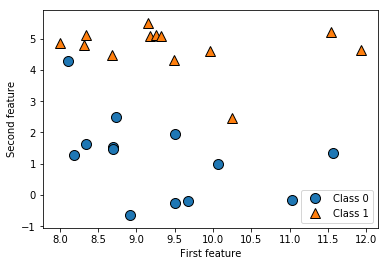

In [3]:
mglearn.discrete_scatter( X[:,0],X[:,1],y ) 
plt.legend( ["Class 0","Class 1"],loc=4 )
ax = plt.gca()
ax.set_xlabel( "First feature" )
ax.set_ylabel( "Second feature" )

> * mglearn.discrete_scatter( X[:,0],X[:,1],y )    
数据点的第一个特征做x轴, 第二个特征做y轴, 数据点的标签类别做marker;

#### 单特征单响应数据集wave

wave数据集的一般结构:

In [4]:
X,y = mglearn.datasets.make_wave(n_samples=40)
%ap X.shape; X[:5,:];; y.shape; y[:5] 

X.shape   X[:5,:] 
-------  ---------
(40, 1)  [[-0.75],
          [ 2.7 ],
          [ 1.39],
          [ 0.59],
          [-2.06]]

y.shape                 y[:5]               
-------  -----------------------------------
(40,)    [-0.45,  0.33,  0.78,  0.03, -1.39]


将wave数据集可视化:

Text(0,0.5,'Target')

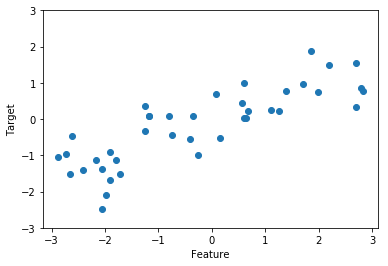

In [5]:
plt.plot(X,y,'o')
plt.ylim(-3,3)
ax = plt.gca()
ax.set_xlabel( "Feature" )
ax.set_ylabel( "Target" )

#### 乳腺癌数据集cancer

**用整数序列作为类别名的标签**    
**target**是每个数据点所对标签组成的列表, 元素个数为数据点的个数, 元素范围为 0~(类别个数-1);   
**target_names**是包含类别名的字符串列表, 元素个数为类别个数;

cancer数据集的一般结构:

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# 数据集的键
print( "cancer.keys() = {}\n".format(cancer.keys()) )
# 数据集的数据形状
print( "1. cancer.data.shape = {}\n".format(cancer.data.shape) )
# 前三个特征的名字
print( "2. cancer.feature_names[:3] = {}\n".format(\
                                               cancer.feature_names[:3]) )
# 前三个数据点对应的标签
print( "3. cancer.target[:3] = {}\n".format(cancer.target[:3]) )
# 所有类别名
print( "4. cancer.target_names[:] = {}\n".format(cancer.target_names[:]) )
# 介绍文档的局部
print( "5. canser.DESCR:\n{}\n ...".format(cancer.DESCR[100:200]) )

cancer.keys() = dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

1. cancer.data.shape = (569, 30)

2. cancer.feature_names[:3] = ['mean radius' 'mean texture' 'mean perimeter']

3. cancer.target[:3] = [0 0 0]

4. cancer.target_names[:] = ['malignant' 'benign']

5. canser.DESCR:
----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric,
 ...


>**bincount()**函数: 用于统计下标或类别在数组中出现的次数;  
* 因为 **np.unique(cancer.target) = array([0,1])**, 所以**类别集合**是用**连续的整数集合**表示的, 每个整数都对应一个类别名;    
*  又因为这些整数从0开始记起, 可等效为数组的下标, 所以可以使用统计下标个数的函数来统计类别的个数;

统计每个类别所含数据点的个数:

In [7]:
print( "Sample counts per class:{}".format({n:v for n,v in zip( \
                    cancer.target_names, np.bincount(cancer.target))}) )

Sample counts per class:{'malignant': 212, 'benign': 357}


使用一维数组的下标存取可以实现(target_names[target]), 将target数组中的每个标签替换成其对应的类别名: 

In [8]:
# %ap cancer.target[::100].dtype
# cancer.target_names.dtype
%ap cancer.target_names; cancer.target[::100];;cancer.target_names[cancer.target[::100]]

  cancer.target_names    cancer.target[::100]
-----------------------  --------------------
['malignant', 'benign']  [0, 0, 1, 0, 0, 1]  

               cancer.target_names[cancer.target[::100]]                
------------------------------------------------------------------------
['malignant', 'malignant', 'benign', 'malignant', 'malignant', 'benign']


#### 波士顿房价数据集boston

可以把某些特征之间的乘积作为新的特征项加入到原始数据集, 从而扩大原始数据集, **特征工程**;

波士顿数据集的一般结构:

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
X,y = mglearn.datasets.load_extended_boston()
%ap boston.data.shape; X.shape

boston.data.shape   X.shape  
-----------------  ----------
(506, 13)          (506, 104)


***

### K近邻模型

#### k近邻分类器

k近邻分类的本质: 靠的近的数据点越有可能同类;

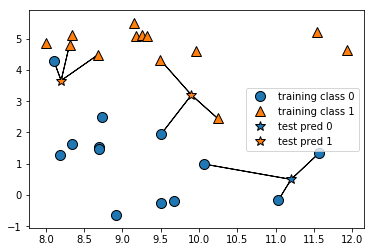

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

用于分类的K近邻模型在**KNeighborsClassifier**类中实现;    
在forge数据集拟合3近邻模型;

In [11]:
#导入数据并将数据分为训练集和测试集
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split( X,y,random_state=0 )
#导入模型类并将其实例化
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier( n_neighbors=3 )
#利用训练集对这个分类器进行拟合
clf.fit( X_train,y_train )
#用predict方法对测试集进行预测
clf.predict(X_test)
#调用score方法评估模型的泛化能力
print( "Testset accuracy: {:.2f}".format(clf.score(X_test,y_test)) )

Testset accuracy: 0.86


#### 如何分析K近邻分类器

**决策边界**：根据平面中每个点所属的类别对平面进行着色, 可以在多个类别的分界处显示决策边界, 二维数据集和高维数据集(决策树模型)都可以画决策边界;

邻居个数(n_neighbors)对决策边界的影响:

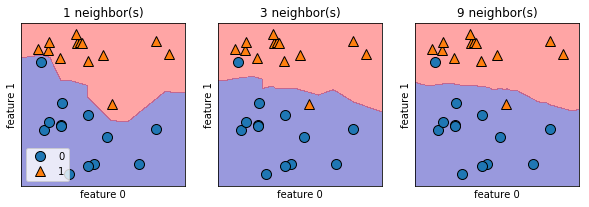

In [12]:
fig,axes = plt.subplots( 1,3,figsize=(10,3) )
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier( n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator( clf,X,fill=True,eps=0.5,\
                                    ax=ax,alpha=.4)
    mglearn.discrete_scatter( X[:,0],X[:,1],y,ax=ax )
    ax.set_title( "{} neighbor(s)".format(n_neighbors) )
    ax.set_xlabel( "feature 0" )
    ax.set_ylabel( "feature 1" )
axes[0].legend(loc=3)

>1. mglearn.plots.plot_2d_separator( clf,X )    
clf的属性中保存了模型对X的预测结果, 以此找出对应数据X的类别边界;

>2. **当邻居个数为1时, 模型最为复杂**, 但是模型的泛化能力可能很差, 如果想获得泛化性能更好的模型; 可以逐渐提高邻居个数降低模型的复杂度; 决策边界越平滑, 模型越简单; 

求K近邻模型在乳腺癌数据集上的最佳邻居个数?

最佳邻居点个数为: 6


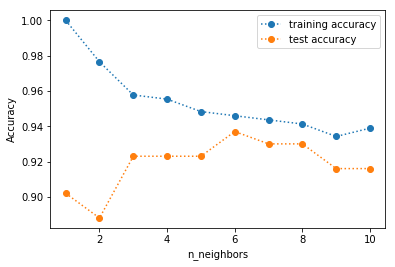

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
                cancer.data, cancer.target,
                stratify=cancer.target, random_state=66 )
training_accuracy = []
test_accuracy = []
neighbors_setting = range(1,11)

for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
    training_accuracy.append( clf.score(X_train,y_train) )
    test_accuracy.append( clf.score(X_test,y_test) )                     
plt.plot( neighbors_setting,training_accuracy,':o' )
plt.plot( neighbors_setting,test_accuracy,':o' )
ax = plt.gca()
ax.set_xlabel( "n_neighbors" )
ax.set_ylabel( "Accuracy" )
plt.legend( ["training accuracy","test accuracy"] )

print( '最佳邻居点个数为: {:d}'.format(
                        neighbors_setting[np.argmax( test_accuracy )] ) )

#### K近邻回归

k近邻回归的本质: 将k个近邻目标值的平均值作为待测值的结果;

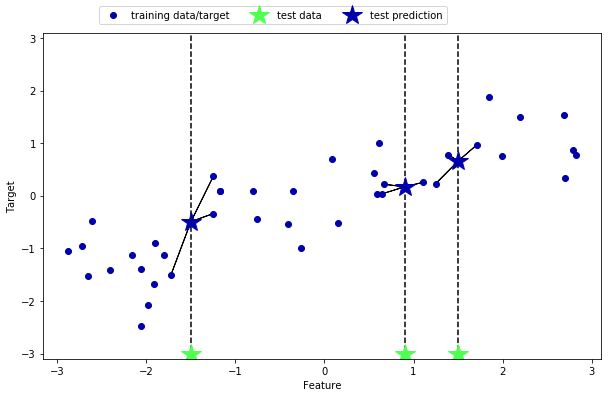

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

用于回归的K近邻算法在**KNeighborsRegressor**类中实现;    
在wave数据集上演示k近邻回归的用法;

In [15]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave( n_samples=40 )
X_train,X_test,y_train,y_test = train_test_split( X,y,random_state=0 )
reg = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
print( "Testset accuracy: {:.2f}".format( reg.score(X_test,y_test)) )

Testset accuracy: 0.83


#### 分析KNeighborsRegressor

对于一维的wave数据集, 可以查看这一个特征取连续值时模型所对应的预测结果:

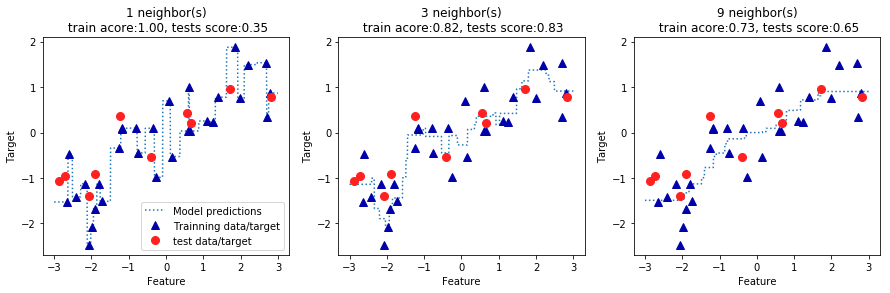

In [16]:
fig,axes = plt.subplots(1,3,figsize=(15,4) )
line = np.linspace(-3,3,1000).reshape(-1,1) #假设特征取连续的值
for n_neighbors,ax in zip( [1,3,9],axes ):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(\
                                                   X_train,y_train)
    ax.plot( line,reg.predict(line),':' )
    ax.plot( X_train,y_train,'^',c=mglearn.cm2(0), markersize=8)
    ax.plot( X_test,y_test,'o',c=mglearn.cm2(1),markersize=8)
    ax.set_title( \
                 "{} neighbor(s)\n train acore:{:.2f}, tests score:{:.2f}".format(\
                  n_neighbors, reg.score(X_train,y_train), reg.score(X_test,y_test)) )
    ax.set_xlabel( "Feature" )
    ax.set_ylabel( "Target" )

axes[0].legend( ["Model predictions", "Trainning data/target",\
                                              "test data/target"],loc="best" )

#### k近邻模型小结

**分类器**:  
* sklearn.neighbors.KNeighborsClassifier()
* sklearn.neighbors.KNeighborsRegressor()

**参数**:  
* 邻居个数: n_neighbors 3-6
* 数据点距离的度量方法: 默认欧式距离;  

**优点**:
* 容易理解和不需要调节过多参数, 可作为一般数据的尝试模型;
* 如果特征数不是很多, 样本数不是很大, 预测速度通常很快;

**缺点**:
* 不适用超多特征(>100)数据集
* 不适用稀疏数据集(data的大多数元素为0);
* k-NN算法要求对数据进行预处理;


***

### 线性模型: sklearn.linear_model

#### 线性回归模型

**线性模型**: 将预测的响应值(target)看做是输入特征的加权求和, 也就是将target看做是每个特征的线性组合, 权重和组合系数用$\boldsymbol{w}$表示; $\boldsymbol{w}$亦可看做是高维空间中的斜率;  不同线性回归模型的本质区别在于求解参数$\boldsymbol{w}$和b的方式不同:

$\large
\hat y = w_0*x_0 + w_1*x_1 + \dots + w_p*x_p + b$(p个特征p个斜率)

线性模型对wave数据集的预测结果:

w[0]: 0.393906  b: -0.031804


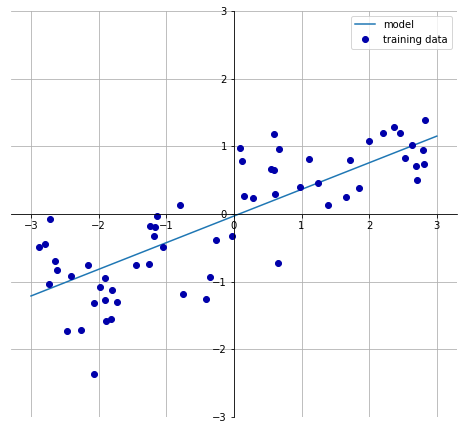

In [17]:
mglearn.plots.plot_linear_regression_wave()

>在高维数据集中, 这条模型线是高维空间中的一条线, 只存在于数学空间(以代数的形式隐含在模型当中), 无法可视化; 但是以实验值为x轴, 模型预测值为y轴, 如果模型拟合的越好, 这些离散点就越靠近坐标轴的对角线; 

#### 普通最小二乘法(OLS)

**特点**:  
* 通过**最小化均方误差函数**而得到线性模型的系数; 
* 没有参数, 不可调节模型复杂度;
* 低维数据集上数据点易于偏离模型线(欠拟合);    
* 高维数据集上数据点过于靠近模型线(过拟合);

将OLS用在一维wave数据集上:

In [18]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave( n_samples=60 )
X_train,X_test,y_train,y_test = train_test_split( X,y,random_state=42 )
lr = LinearRegression().fit(X_train,y_train)
%ap 5 lr.coef_; np.round(lr.intercept_,3);; np.round(lr.score(X_train,y_train),2); np.round(lr.score(X_test,y_test),2)

lr.coef_     np.round(lr.intercept_,3)
--------     -------------------------
[0.39]       -0.032                   

np.round(lr.score(X_train,y_train),2)     np.round(lr.score(X_test,y_test),2)
-------------------------------------     -----------------------------------
0.67                                      0.66                               


>* coef_属性: 线性组合的系数    
>* intercept_属性: 截距

将OLS用在波士顿房价数据集:

In [19]:
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(\
                                     X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)
%ap np.round(lr.score(X_train,y_train),2); np.round(lr.score(X_test,y_test),2)

np.round(lr.score(X_train,y_train),2)  np.round(lr.score(X_test,y_test),2)
-------------------------------------  -----------------------------------
0.95                                   0.61                               


>在高维数据集上, 模型显示出明显的过拟合, OLS没有参数可调, 所以并不能减少其过拟合的程度; 

#### 岭回归

**正则化**: 对权重施加附加约束, 要求每个特征对输入的影响尽可能的小(特征系数->0), 以避免过拟合; (正则化~泛化能力: 将正则化等视为泛化能力);

比较正则化程度不同的岭回归和线性回归的模型效果:

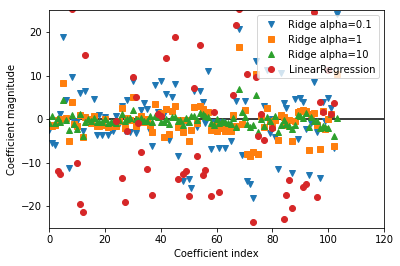

In [20]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train) #波士顿房价数据集
tr = ridge.score(X_train,y_train), 
te = ridge.score(X_test,y_test)
# ridge.coef_

ridge10 = Ridge(alpha=10.0).fit(X_train,y_train)
tr10 = ridge10.score(X_train,y_train)
te10 = ridge10.score(X_test,y_test)
# ridge10.coef_

ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
tr01 = ridge01.score(X_train,y_train)
te01 = ridge01.score(X_test,y_test)
# ridge01.coef_

plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.hlines(0, 0, len(lr.coef_)+20) # 线性回归只有一个系数

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.axis([0, 120, -25, 25])
plt.legend()

>**alpha**, 正则化参数, 是系数限制性的度量，alpha越大, 正则化就越明显，每个特征的系数越趋近于0，从而降低训练集性能, 但可能会提高泛化性能; (alpha!~系数: alpha与系数成反比)

模型性能与数据集大小之间的曲线叫做**学习曲线**;

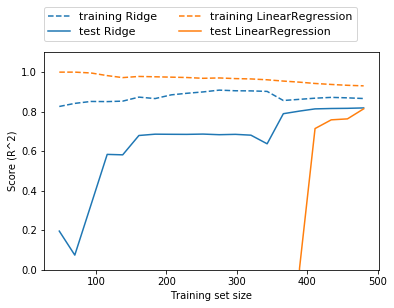

In [21]:
mglearn.plots.plot_ridge_n_samples() # 蓝色的是岭回归, 橘色的是线性回归

>小于400个数据点时岭回归模型比线性模型可靠地多;

#### L1正则化

**L1正则化**会要求某些特征值的系数为0, 因此可以该**Lasso模型**看做是一种基于线性回归的**自动化特征选择**方法; 

In [22]:
from sklearn.linear_model import Lasso

In [23]:
# 默认alpha=1会产生欠拟合
lasso = Lasso().fit(X_train,y_train) 
%ap np.round(lasso.score(X_train,y_train),2); np.round(lasso.score(X_test,y_test),2);;\
              np.sum(lasso.coef_!=0) # 特征系数不为0的个数,用到的特征数

np.round(lasso.score(X_train,y_train),2)  np.round(lasso.score(X_test,y_test),2)
----------------------------------------  --------------------------------------
0.29                                      0.21                                  

np.sum(lasso.coef_!=0) # 特征系数不为0的个数,用到的特征数
------------------------------------------
4                                         


In [24]:
# 减小alpha以降低欠拟合
lasso0d01 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
np.round( lasso0d01.score(X_train,y_train),2 ), \
np.round( lasso0d01.score(X_test,y_test),2 ),\
np.sum( lasso0d01.coef_!=0 )

(0.9, 0.77, 33)

In [25]:
# alpha极小时产生过拟合
lasso0d0001 = Lasso(alpha=0.0001,max_iter=100000).fit(\
                                      X_train,y_train)
np.round( lasso0d0001.score(X_train,y_train),2 ),\
np.round( lasso0d0001.score(X_test,y_test),2 ),np.sum(lasso0d0001.coef_!=0)

(0.95, 0.64, 94)

正则化程度不同的lasso回归与岭回归的比较:

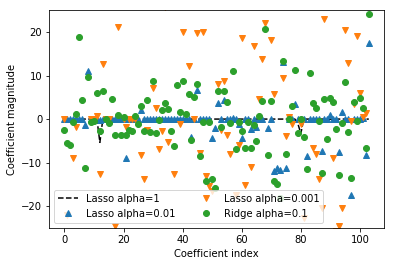

In [26]:
plt.plot(lasso.coef_, 'k--', label="Lasso alpha=1")
plt.plot(lasso0d01.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso0d0001.coef_, 'v', label="Lasso alpha=0.001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-25,25)
plt.legend(ncol=2)

> 两个模型中首选岭回归, 如果特征个数比较多, 并且只有几个是重要的, 那么可用lasso回归排除多余特征;  

>scikit-learn 还提供了**ElasticNet类**, 结合了Lasso和Ridge的惩罚项, 需要调节两个alpha值; 

#### 用于分类的线性模型

线性模型用于二分类:  

$\large
\hat y = ( w_0*x_0 + w_1*x_1 + \dots + w_p*x_p + b) > 0 $, 将0,1传递给target $\hat y$;

用于分类的线性模型有两种:    
* **LogisticRegression类**: 逻辑回归类是一个线性分类器;  
* **LinearSVC类**:  Linear Support Vector Classifier, 线性支持向量分类器;

线性SVC和Logistic回归在forge数据集上的决策边界:

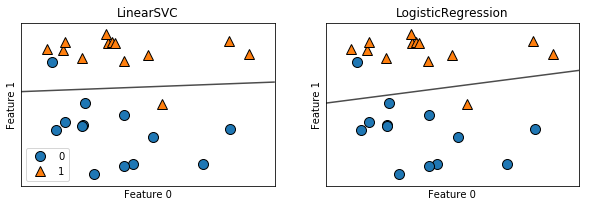

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()
fig,axes = plt.subplots( 1,2,figsize=(10,3) )
for model,ax in zip( [LinearSVC(),LogisticRegression() ],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator( clf,X,fill=0,eps=0.5,ax=ax,alpha=0.7 )
    mglearn.discrete_scatter( X[:,0],X[:,1],y,ax=ax )
    ax.set_title("{}".format(clf.__class__.__name__)) #不用另设关于模型名的字符串变量
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")   
axes[0].legend()

线性SVC和Logistic回归默认使用L2正则化, 正则化参数用**C**表示, C与alpha成反比关系, C越大表示正则化能力越弱; (C~系数: C与系数成正比);

正则化程度不同的SVC模型在forge数据集上的决策边界:

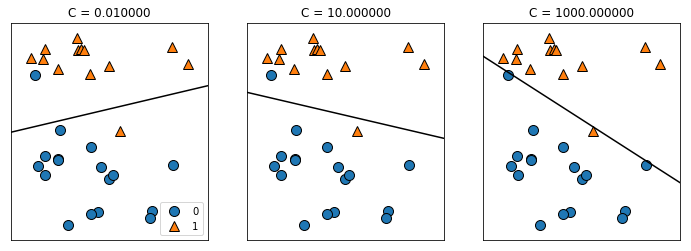

In [28]:
mglearn.plots.plot_linear_svc_regularization()

>**将C值的大小认为是斜率的大小**:  
C值的大-->|权重系数|大-->正则化弱-->泛化弱-->过拟合-->力图所有的训练数据都分类正确;  
C值的小-->|权重系数|小-->正则化强-->泛化强-->欠拟合-->只是将大多数的训练数据分类正确;  


<span id="fi1"> 乳腺癌数据集上应用L2正则化的LogisticRegression:</span>

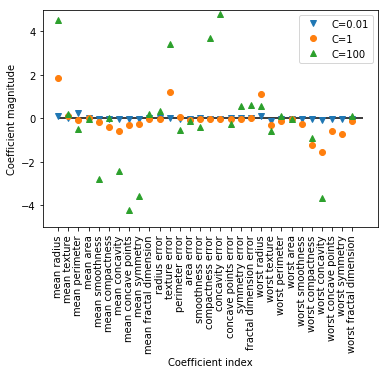

In [29]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(\
                                cancer.data,cancer.target,\
                                stratify=cancer.target,random_state=42)
# C=1, (0.953,0.958)
logreg = LogisticRegression().fit(X_train,y_train)
# C=100, (0.972,0.965)
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
# C=0.01, (0.934,0.930)
logreg0d01 = LogisticRegression(C=0.01).fit(X_train,y_train)

# 不同C值对高维分类数据集每个特征的系数影响
plt.plot(logreg0d01.coef_.T, 'v', label="C=0.01")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.hlines(0,0,cancer.data.shape[1]) # 垂直于x轴的线
plt.xticks( range(cancer.data.shape[1]),cancer.feature_names,rotation=90) # 刻度
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5,5)

plt.legend()

>对线性模型系数的解释应始终保持保留态度??    
* 从texture error看来, 我们认为纹理错误越大, 越有可能使target大于0(良性);    
* 从mean perimeter来看, 模型改变, 系数的正负号改变, 对target的正负影响改变, 我们不能以此指标来评价target是正是负了;    
* 其实, 这些系数只是反映了对应特征在模型当中的参与程度, 根本不能说明某个特征对某个target类别的影响程度, 只能说它对所有类别的影响程度;
* 即某个系数越大, 不能说这个特征对类别良或类别恶影响大, 而应该描述成对类别良和类别恶的影响程度都比其他系数对应的特征的影响程度大;

乳腺癌数据集上应用L1正则化的LogisticRegression:

C=0.001,traning score:0.91,test score:0.92; 特征数:3
C=1.000,traning score:0.96,test score:0.96; 特征数:11
C=100.000,traning score:0.99,test score:0.98; 特征数:23


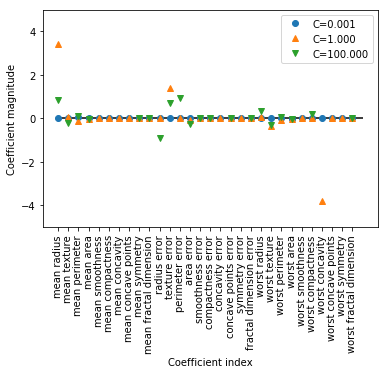

In [30]:
for C, marker in zip( [0.001, 1, 100], ['o', '^', 'v'] ):
    lr_l1 = LogisticRegression( C=C,penalty='l1').fit(X_train,y_train)
    print( 'C={:.3f},traning score:{:.2f},test score:{:.2f}; 特征数:{}'.
                     format(C, \
                     lr_l1.score(X_train,y_train),\
                     lr_l1.score(X_test,y_test),\
                     np.sum(lr_l1.coef_!=0)) )
    
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))

plt.hlines(0,0,cancer.data.shape[1])
plt.xticks( range(cancer.data.shape[1]),cancer.feature_names,rotation=90 )
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5,5)
plt.legend()

#### 用于多分类的线性模型

从二分类的线性模型推广到多分类的线性模型需要一定的技巧: **一对其余**, 让每个类别都对应一个二分类器, 以便与其他(n-1)个类别分开, 最后统计测试点在每个分类器上的分数, 分数最高的分类器所对应的类别即为测试点的类别;

Logistic回归与一对其余的方法不同, 但是对每个类别也对应一个分类器, 每个类别都有一个系数向量和一个截距;

blobs数据集: 斑点数据集

X.shape        y[:5]     
--------  ---------------
(100, 2)  [2, 1, 0, 1, 2]


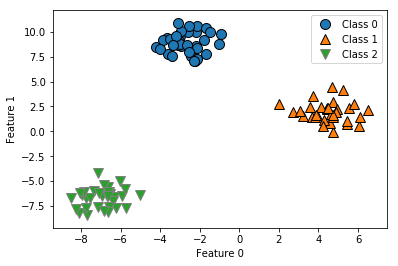

In [31]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
%ap X.shape; y[:5]

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])

线性模型处理多分类问题: 

In [32]:
linear_svc = LinearSVC().fit(X,y)
print("3个分类器的系数矩阵:\n",linear_svc.coef_)
print("3个分类器的截距:",linear_svc.intercept_)

3个分类器的系数矩阵:
 [[-0.17  0.23]
 [ 0.48 -0.07]
 [-0.19 -0.2 ]]
3个分类器的截距: [-1.08  0.13 -0.09]


> 线性模型处理多分类问题时, 实际上调用的一个分类器会自动的分解为多个分类器, 最终系数矩阵的每一行和每一列都对应每一个类别的每一个特征;   

将三个分类器给出的直线可视化:

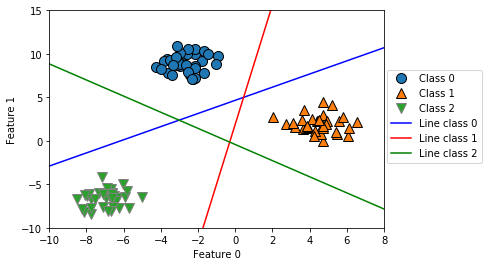

In [33]:
mglearn.discrete_scatter( X[:,0],X[:,1],y )
line = np.linspace( -15,15 )
a,b,c = linear_svc.coef_,linear_svc.intercept_,['b','r','g']

for coef,intercept,color in zip( a,b,c ):
    liney = -(line*coef[0]+intercept)/coef[1]
    # 特征x0和x1之间的线性关系就是分类器的决策边界
    plt.plot( line,liney,'-',c=color)

plt.axis([-10,8,-10,15])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0','Class 1','Class 2','Line class 0',\
            'Line class 1','Line class 2'],loc=(1.01,0.3))

中间区域的类别

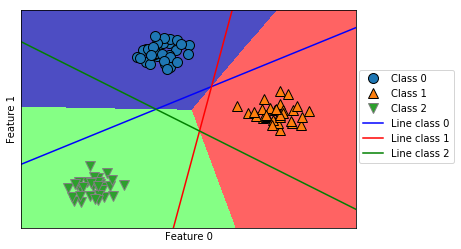

In [34]:
mglearn.plots.plot_2d_classification( linear_svc,X,fill=True,alpha=0.7 ) # 可划分中间区域的决策边界
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
a,b,c = linear_svc.coef_,linear_svc.intercept_,['b','r','g']
for coef,intercept,color in zip(a,b,c):
    liney = -(line*coef[0]+intercept)/coef[1]
    # 特征x0和x1之间的线性关系就是分类器的绝策边界
    plt.plot( line,liney,'-',c=color)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0','Class 1','Class 2','Line class 0',\
            'Line class 1','Line class 2'],loc=(1.01,0.3))

#### 线性模型小结

**分类器**:  
* sklearn.linear_model.LinearRegression()  
* sklearn.linear_model.Ridge()  
* sklearn.linear_model.Lasso()  
* sklearn.linear_model.LogisticRegression()  
* sklearn.svm.LinearSVC()  

**参数**:  
* 正则化参数: alpha和C, alpha!~w(!=0), C~w(=0);  
* 正则化选项: penalty = 'l1'['l2'];  
* 大型数据集; solver = 'sag';

**优点**:  
* 训练速度和预测速度非常快;  
* 可以推广到十万或者上百万的数据集;  
* 如果特征数量大于样本数量, 线性模型的表现通常很好;  
* 可以理解特征的重要性程度, 使用L1正则化还可以排除某些特征; 

**缺点**:  
* 不适合低维数据集;  
* 如果数据集包含高度相关的特征, 很难对系数做出解释;


***

### 朴素贝叶斯分类器

#### 贝叶斯理论

**理论假设**:
* 特征对之间相互独立
* 每个特征都有相同的权重  

**贝叶斯理论**:    

$\large P({y_i}|X^{'}) = \frac{P(X|\boldsymbol{y})P(\boldsymbol{y})}{P(X)_{常数}}$,   

等式右边为已发生事件, 事件的特征集即数据集$X$, 事件结果即$\boldsymbol{y}$;    
等式左边为未发生事件, 未发生事件的特征集为$X^{'}$,暂认为只含一个数据点和一个事件结果;  

* 其中 $X$ 为特征矩阵: $ X = ( x_0,x_1,\dots,x_n )$;   

* $\boldsymbol{y}$ 为类别向量: $\boldsymbol{y} = (y_1,y_2,..,y_k)$;  

* $P(X_i|y_i)$表示在已发生事件中, 类别 $y_i$ 中特征 $X_i$ 存在的概率;  

* $P(y_i)$ 表示已发生事件中类别 $y_i$ 发生的概率;

* 公式可求每一个类别$y_i$ 在新特征下的发生概率;

不同的朴素贝叶斯分类器的主要差异在$P(X_i|y_i)$的分布假设;    
例如高斯朴贝模型(GaussianNB)的条件概率函数为:   

$\Large
P(X_i|y_i) = 
\frac{1}{\sqrt{2\pi\sigma^2}} 
exp[ -\frac{ (x_i - \mu_{y_i})^2}
{2\sigma_{y_i}^2} ]$

#### 贝叶斯分类器的类别

**朴素贝叶斯分类器**是一种比线性分类器速度更快的分类器, 朴素贝叶斯模型的泛化能力要比线性分类器稍差, 它通过单独查看每个特征来学习参数;   

**sklearn中有三种朴素贝叶斯分类器**:  
* **高斯分类器**: GaussianNB, 应用于任意连续数据;  
* **伯努利分类器**: BernoulliNB, 应用于二分类数据;   
* **多项式分类器**: MultinomialNB, 应用于计数数据;

**算法预测的核心**: 将数据点将与每个类别的统计数据进行比较, 将最匹配的类别作为预测结果;    
* BernoulliNB分类器会计算每个类别中每个特征不为0的元素的个数; 
* MultinomialNB分类器会计算每个类别中每个特征的平均值;  
* GaussianNB分类器会计算每个类别中每个特征的平均值和标准差; 

自建数据集上演示伯努利分类器的算法核心:

In [35]:
# 创建元素值只能为0,1的数据集X,y
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y=np.array([0,1,0,1])
X,y

(array([[0, 1, 0, 1],
        [1, 0, 1, 1],
        [0, 0, 0, 1],
        [1, 0, 1, 0]]), array([0, 1, 0, 1]))

In [36]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(X,y)
bnb.feature_count_ #类别0和类别1: 每个特征的值不为0的个数;

array([[0., 1., 0., 2.],
       [2., 0., 2., 1.]])

In [37]:
# bnb.feature_count_的内部程序
counts={}
for label in np.unique(y):
    # 某特征各分量之和, 即为每个特征不为0的个数
    counts[label] = X[y==label].sum(axis=0) 
    print("Feature counts: \n{}".format(counts))

Feature counts: 
{0: array([0, 1, 0, 2])}
Feature counts: 
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


iris数据集上应用高斯分类器:

In [38]:
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.0


#### 贝叶斯分类器小结

**分类器**:  
* sklearn.naive_bayes.GaussianNB();  
* sklearn.naive_bayes.BernoulliNB();  
* sklearn.naive_bayes.MultinomialNB();   

GaussianNB用于高维数据集, BernoulliNB和MultinomialNB用于稀疏数据;  


**参数**:  
* 平滑化参数: alpha越大平滑性越强,  模型复杂度越低;  

**优点**:  
* 训练过程容易理解;  
* 对参数的鲁棒性相对较好;  
* 训练速度和预测速度都很快, 比线性模型的速度还快;  
* 可用于高维数据集合稀疏数据集;  

**缺点**:  
* 模型的假设条件似乎过强;  


***

### 决策树

区分几种动物的决策树:

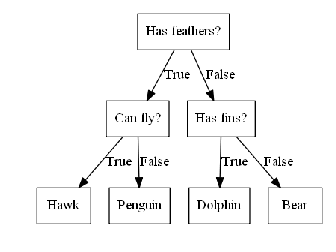

In [39]:
mglearn.plots.plot_animal_tree()

#### 构造决策树

**决策树**本质上是从一层层的if/else问题中进行学习;   
**构造决策树**要求以最快的速度得到正确答案;   
提出if/else问题并作出回答的过程叫做**测试**;   
对于连续数据最一般的**测试形式**为: 特征 $i$ 的值是否大于 $a$?   
算法执行的过程中的每一步, 都会 "搜遍所有可能的测试", 并找出对目标变量来说**信息量最大**的那一个测试; 

二月数据集上的决策树模型

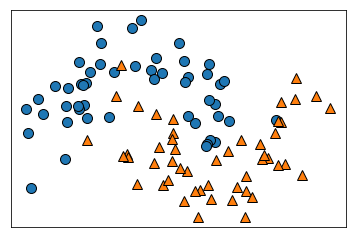

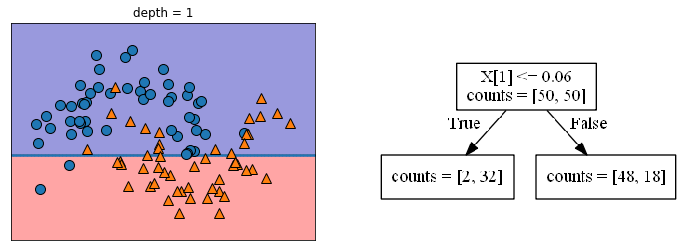

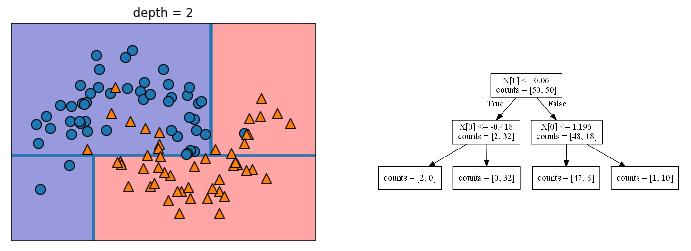

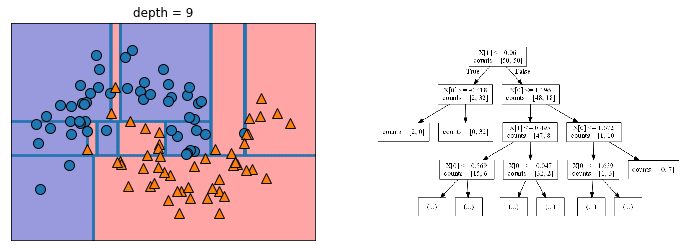

In [40]:
mglearn.plots.plot_tree_progressive()

> 结点结构:    
* 得到下层节点的测试条件
* 节点中的样本个数
* 所含样本的类别分布
* 最有可能的类别

> 只包含单一类别或单一回归值的结点叫做**纯叶结点**;

> 把多个回归值或单一回归值等视为一个类别, 即可把分类决策树应用到回归决策树;

#### 控制决策树的复杂度

决策树模型默认将树完全展开, 让所有的叶子节点变为**纯节点**, 使模型达到一种最大程度的过拟合状态;  

若想提高泛化能力, 可施行**预剪枝策略**:  
* 限制树的最大深度: max_depth;  
* 限制叶节点的最大数目: max_leaf_nodes,;  
* 规定一个节点中数据点的最小数目: min_samples_leaf(可认为将多少个回归值作为一个类别);

在cancer数据集上了解预剪枝参数的对模型的影响;

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
# 默认情况下训练集精度为1
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data, cancer.target, \
                                     stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0).fit( X_train,y_train )
print( "训练集精度:", tree.score(X_train,y_train) )
print( "测试集精度:", np.round(tree.score(X_test,y_test),2) )

训练集精度: 1.0
测试集精度: 0.94


In [43]:
# 设置树的最大深度为4, 即只能问四个问题, 做四次测试;
tree = DecisionTreeClassifier(max_depth=4,\
                      random_state=0).fit(X_train,y_train)
print( "训练集精度:", np.round(tree.score(X_train,y_train),2) )
print( "测试集精度:", np.round(tree.score(X_test,y_test),2) )

训练集精度: 0.99
测试集精度: 0.95


#### 分析决策树

tree模块提供了将树的节点信息保存为dot文件的函数**expert_graphviz()**, 和将dot文件显示为dot图像的函数**Source()**; 

In [44]:
from sklearn.tree import export_graphviz
export_graphviz( tree,out_file="dataout/tree.dot",class_names=["malignant","benign"],\
               feature_names=cancer.feature_names,impurity=False,filled=True )

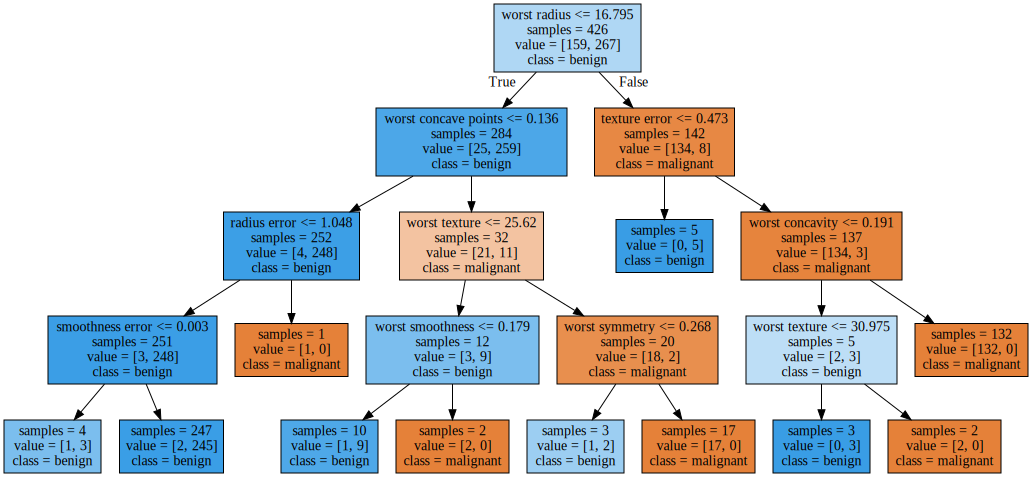

In [45]:
from brtoz.brdot import dot2graph 
dot2graph("dataout/tree.dot")

#### 树的特征重要性

**特征重要性**: 每个特征在决策过程中的参与程度; 保存在feature_importances_属性中;

In [46]:
tree.feature_importances_[10:15]# 第11-16个特征的特征重要性分数

array([0.01, 0.05, 0.  , 0.  , 0.  ])

In [47]:
sum(tree.feature_importances_) # 所有特征的特征重要性分数之和为1

0.9999999999999999

<span id="fi2">将决策树的特征重要性可视化:</span>

In [48]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh( range(n_features),\
             model.feature_importances_,align="center" )
    plt.xlabel=("Feature importance")
    plt.ylabel=("Feature")
    plt.yticks( np.arange(n_features),cancer.feature_names )
    # 给特征系数图一个名字, 便于比较不同模型的特征系数
    plt.title("Feature Importances of {}".format(model.__class__.__name__)) 

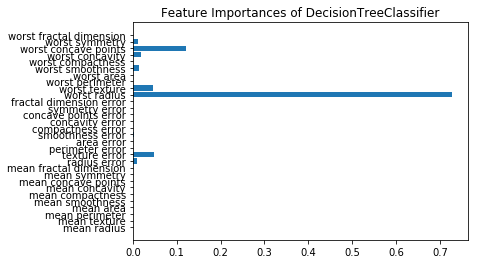

In [49]:
plot_feature_importances_cancer(tree)

> **关于特征重要性的注意事项**: 

>* 特种重要性很大, 说明这个特征很重要, 但是如果特征重要性很小却不能说明这个特征不重要, 只能说明该特征没有被树选中, 可能另一个特征也包含了同样的信息, 但是树决策只能选择一个特征;   

>* 线性模型的系数也可作为一种特征重要性的度量方式, 但是线性模型的系数可以为负值, 或者超过1, 而决策树模型的特征重要性只能是[0,1]之间的实数; 

>* 不能根据一个特征的大小判断整个数据点的类别, 因为类别是每个特征综合作用的表现结果, 而不是**单一特征和类别之间不存在的单调关系**表现的; 

>* 我们应该始终牢记: **单一特征和和类别之间不应存在单调关系, 如果存在的话, 那么选择另外那些特征参与模型的拟合将变得毫无意义**;

>* 虽然最坏半径这个特征很重要, 但是我们不能得出**最坏半径大的样本是恶性样本**或**最坏半径大的样本是良性样本**这样的结论; 最坏半径大对两者的影响同等重要; 

>* 我们的潜意识可能会自主的认为 **worst radius**和类别**恶**之间存在单调关系, 但事实情况确是: 最坏半径大的样本仍有可能是是良性样本;   

特征和类别之间没有单调关系的说明: 特征X[1]和类别之间不是单调关系;

Feature importances: [0. 1.]


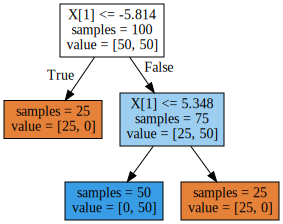

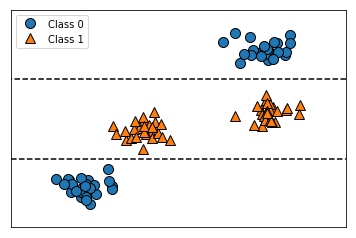

In [50]:
mglearn.plots.plot_tree_not_monotone()

>* 只用到了特征X1, 但是特征X0对类别仍有影响;    
>* 不能说特征X1越大, 待测点越属于类别0, 或类别1;

#### 用于回归的决策树模型

* **分类树**: 基于决策树的分类模型;  

* **回归树**: 基于决策树的回归模型;  
    * 如何理解树的回归性? 把多个回归值当做单一类别对待;
    * 回归树不能用于外推, 不能在训练数据之外进行预测;

内存价格数据集:

Text(0,0.5,'Price in $/Mbyte')

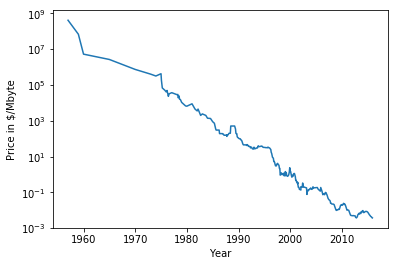

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
ram_prices = pd.read_csv( 'data/ram_price.csv',usecols=[u'date',u'price'] )
# print( ram_prices.hea00d() )

plt.semilogy( ram_prices.date, ram_prices.price)
ax = plt.gca()

ax.set_xlabel("Year")  # 如果遇到 'str' object is not callable -> 重启运算核
ax.set_ylabel("Price in $/Mbyte")  

利用2000年前的价格预测2000年后的价格, 决策树回归和线性回归的对比:

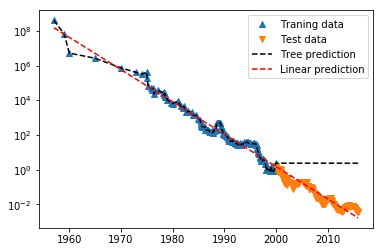

In [52]:
from sklearn.tree import DecisionTreeRegressor
# 以2000年为时间点，将数据分为训练集和测试集
data_train = ram_prices[ram_prices.date<2000] # DataFrame
data_test = ram_prices[ram_prices.date>=2000] # DataFrame
X_train = data_train.date[:,np.newaxis] #将一维数据(n行)->二维数据(n行1列)
y_train = np.log( data_train.price) # Series对象

# 决策树模型和线性模型的搭建
tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

#对所有数据进行预测
X_all = ram_prices.date[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#对数变换的逆运算
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

# plot
plt.semilogy(data_train.date,data_train.price,'^',label="Traning data")
plt.semilogy(data_test.date,data_test.price, 'v',label="Test data")
plt.semilogy(ram_prices.date,price_tree,'k--',label="Tree prediction")
plt.semilogy(ram_prices.date,price_lr,'r--',label="Linear prediction")
plt.legend()

>对于决策树模型,训练集过拟合, 测试集根本无法拟合;

#### 决策树小结

**模型中的类**:   
* sklearn.tree.DecisionTreeClassifier();
* sklearn.tree.DecisionTreeRegressor();

**参数**:  
* 预剪枝参数: max_depth, max_leaf_nodes, min_samples_leaf;  

**优点**:
* 模型容易可视化;
* 算法完全不受数据缩放的影响;

**缺点**:
* 即使做了预剪枝, 也会发生过拟合, 泛化性能很差;
* 无法拟合测试集数据

### 决策树集成

**集成**是合并多个机器学习模型来构建更强大模型的方法; 包括**随机森林**和**梯度提升决策树**;

#### 随机森林

**随机森林**本质上是许多**决策树的集合**, 通过将这些树的结果取平均值来降低过拟合; 随机性要求每棵决策树互不相同, 可用过两种方式实现:  
1. 使构造每棵树的数据点发生变化: 对原始数据点进行重复抽样;
2. 使每个节点所针对的**测试特征**不同: 在每个节点处, 算法随机选择特征的一个子集寻找最佳测试, 而不是对所有的特征都寻找最佳测试;

特征子集中特征的个数用参数**max_features**表示, 特征数越多, 每棵树的相似程度越大;   
* if **max_features = n_features**: 特征选择过程中没有添加随机性, 随机森林中的树将会十分相似;  
* if **max_features = 1**: 每个节点只能随机选择一个特征进行测试, 为了更好的拟合数据, 会将树的深度生长的很大很大;

#### 分析随机森林

在二月数据集上应用随机森林模型:

Text(0.5,1,'Random forest')

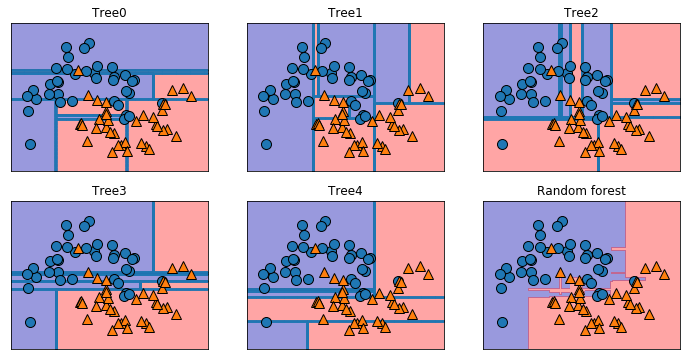

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split( X,y,stratify=y, random_state=42 )
forest = RandomForestClassifier(n_estimators=5,random_state=2).fit(X_train,y_train)

# 显示随机森林中每棵树的决策边界:
fig, axes = plt.subplots( 2,3,figsize=(12,6) )
for i, (ax,tree) in enumerate( zip(axes.ravel(),forest.estimators_) ):
    ax.set_title("Tree{}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train,tree,ax=ax)

# 二月集的决策边界, 整个森林的决策边界 
mglearn.plots.plot_2d_separator( forest,X_train,fill=True,ax=axes[-1,-1],alpha=.4 )
#  二月集的离散数据
mglearn.discrete_scatter( X_train[:,0],X_train[:,1],y_train )
axes[-1,-1].set_title("Random forest")

Text(0.5,1,'Random forest')

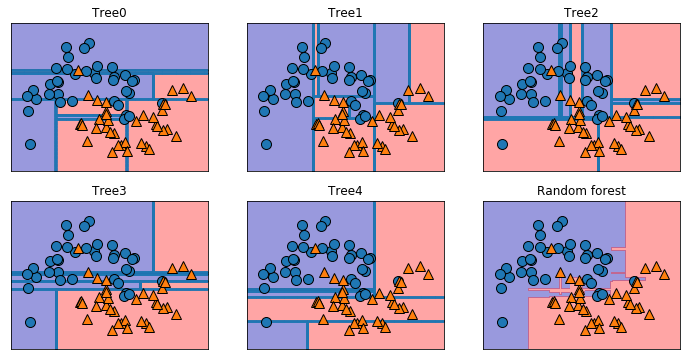

In [54]:
fig, axes = plt.subplots( 2,3,figsize=(12,6) )
for i, (ax,tree) in enumerate( zip(axes.ravel(),forest.estimators_) ):
    ax.set_title("Tree{}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train,tree,ax=ax)

# 二月集的决策边界, 所有树综合作用的结果
mglearn.plots.plot_2d_separator(forest,X_train,fill=True,\
                                ax=axes[-1,-1],alpha=.4)
#  二月集的离散数据
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
axes[-1,-1].set_title("Random forest")

> 随机森林中每棵树模型被保存在forest.estimators_属性当中;    
> mglearn.plots.plot_tree_partition()可以画出树的测试条件边界; 

在乳腺癌数据集上应用随机森林模型:

In [55]:
X_train,X_test,y_train,y_test = train_test_split( cancer.data,cancer.target,\
                                                  random_state=42 )
forest = RandomForestClassifier(n_estimators=100,random_state=0).fit(X_train,y_train )

# 随机森林模型可以外推到测试集
forest.score(X_train,y_train), forest.score(X_test,y_test)

(1.0, 0.972027972027972)

<span id='fi3'> 随机森林模型的特征重要性: </span>

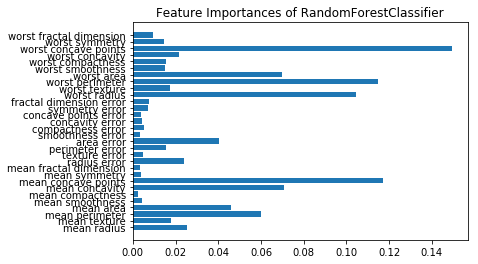

In [56]:
plot_feature_importances_cancer(forest)

#### 随机森林小结

**类**:  
* sklearn.ensemble.RandomForestClassifier()
* sklearn.ensemble.RandomForestRegressor()

**参数**:  
* 树的个数: n_estimators, 越大越好;  
* 最大特征数: $max\_features = (\sqrt{n\_features})_{分类问题}\,\, or\,\, (n\_features)_{回归问题}$;  
* 模型的随机化参数: random_state;  
* 内核个数: n_jobs;
    
**优点**:  
* 不需反复调节参数;  
* 不需数据缩放:  
* 随机森林拥有决策树的所有优点, 同时弥补了其过拟合的缺点;  

**缺点**:
* 树的深度比决策树的还要大, 可视化和解释能力不如单棵决策树;  
* 大型数据集上构建随机森林比较耗费时间和内存;  
* 不适合维度很高的稀疏数据集;  


#### 梯度提升机

采用连续的方式构造树, **每棵树都试图纠正前一棵树的错误**, 由此思想构建的模型叫做**梯度提升机**; 控制梯度提升机模型复杂度的参数有:  
* 学习率**learning_rate**纠正错误的强度;  
* **强预剪枝**树的深度在1-5之间; 
* **树的数量**n_estimators越多, 模型越复杂;

在乳腺癌数据集上应用梯度提升树模型:

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,\
                                                 random_state=0)
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train,y_train)
np.round( (gbrt.score(X_train,y_train), gbrt.score(X_test,y_test)) ,2)

array([1.  , 0.96])

In [58]:
# 通过通过降低学习率减小过拟合的程度
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01).fit(X_train,y_train)
np.round( (gbrt.score( X_train,y_train ),gbrt.score( X_test,y_test )),2 )

array([0.99, 0.97])

 <span id="fi4"> 梯度提升模型的特征重要性 :</span> 

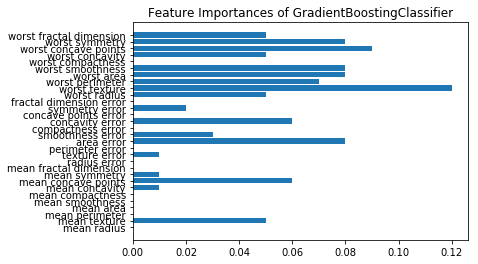

In [59]:
gbrt = GradientBoostingClassifier(random_state=0,\
                      max_depth=1).fit(X_train,y_train)
plot_feature_importances_cancer(gbrt)

> 对比以下模型会发现: 模型不同特征系数不同:   
1. 逻辑回归分类模型: [LogisticRegression()](#fi1);    
2. 决策树模型: [DecisionTreeClassifier()](#fi2);   
3. 随机森林模型: [RandomForestClassifier()](#fi3);   
4. 梯度提升树: [GradientBoostingClassifier()](#fi4);    

> 说明:
> 1. 不同模型对待每个特征的方式不同(关注的焦点不同,讨论问题的方式不同), 特征重要性自然不同;  
2. 对特征重要性的解释应持保留态度: 单一特征永远无法代表所有特征表现出的综合结果;

#### 梯度提升机小结

**类**:  
* sklearn.ensemble.GradientBoostingClassifier()

**调参**:  
1. 根据*个数-时间*和*个数-精度*两条曲线, 选择合适的n_eatimators;
2. 固定estimators, 对不同的learning_rate进行遍历;
3. 调节max_depth;

**优点**:  
* 不需要对数据进行缩放;  
* 比随机森林的预测时间要短;  
* 可控制精度小数点第二位的提高;  
* **适用于二元特征和连续特征同时存在的数据集**;  

**缺点**:  
* 需要仔细调参;
* 不适用于高维稀疏数据;  

### 核支持向量机

**支持向量机**是一种广义线性模型：将在低维空间线性不可分的数据集变换到高维空间后使其线性可分;

* SVC: 支持向量分类    
* SVR: 支持向量回归

> SVM/知乎: https://www.zhihu.com/question/21094489

#### 线性模型与非线性特征

线性模型无法应用于斑点数据集:

In [60]:
X,y0 = make_blobs( centers=4,random_state=8 ) # 4类斑点
y = y0%2   # 将四类变为两类
print(X.shape, set(y0), set(y) )

(100, 2) {0, 1, 2, 3} {0, 1}


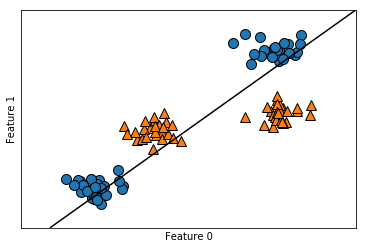

In [61]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator( linear_svm,X )
mglearn.discrete_scatter( X[:,0],X[:,1],y )
ax = plt.gca()
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1");

将低维数据集进行高维扩展:

Text(0.5,0,'Feature1**2')

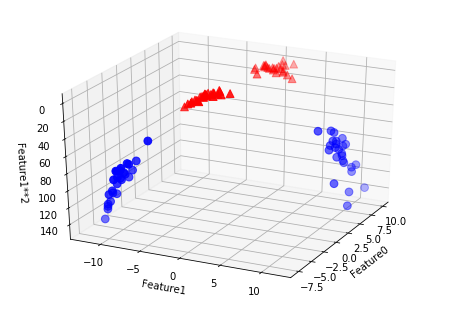

In [62]:
# 添加第二个特征的平方作为新的特征
X_new = np.hstack( [X,X[:,1:]**2] ) #两个都是切片得到二维数组, 只有一个切片得到一维数组

from mpl_toolkits.mplot3d import Axes3D,axes3d
figure = plt.figure()

#3D
ax = Axes3D( figure,elev=-152,azim=-26 )

# y等于0的点
mask = ( y == 0 )
ax.scatter( X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',\
          cmap=mglearn.cm2,s=60 )

# y等于1的点
ax.scatter( X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',\
          cmap=mglearn.cm2,s=60 )

ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1**2")

>1. np.hstack( [X,X[:,1:]**2] )    
    * X[:,1]与X[:,1:]的区别: 一个切片->一维数组, 两个切片->两维数组;
    * np.hstack(): 一维数组沿第一个轴连接, 二维数组沿着第二轴连接;
    * np.vstack(): 一维数组(N,)变为二维数组(1,N), 然后沿着第一轴连接;
    
>2. mask = ( y == 0 ) 组合 X_new[mask,0]    
    * mask是值为是否的布尔数组;
    * 布尔数组做三维数组的下标, 自动调用nonezero()将布尔数组转换为关于"正1"所在位置的下标数组,即找到了所有标签为1的数据点所在的行;
    * ~mask标签为0的数据点所在的行;
    
>3. ax.scatter(): 画出以前两个轴为投影面坐标, 第三个轴为高的空间离散点;

***
**np.vstack([]), np.hstack([]), np.r_[], np.c_[], 是按什么规则对一维数组和二维数组进行的拼接操作?**
***

**vh atack**

1. np.vstack:    
    * This is equivalent to concatenation along the first axis after 1-D arrays of shape `(N,)` have been reshaped to `(1,N)`.
    * 将二维数组沿着第一轴拼接, 如果是一位数组(N,), 先将一维数组变为二维数组(1,N);    
2. np.hstack:     
    * This is equivalent to concatenation along the second axis, except for 1-D arrays where it concatenates along the first axis.    
    * 将二维数组沿着第二轴拼接, 如果是一维数组则沿着第一轴拼接;   


vh stack拼接二维维数组:

In [63]:
a2 = np.array([[1,2,3]]) # 占一行的二维数组,
b2 = np.array([[4],[5],[6]]) # 占一列的二维数组

In [64]:
%ap a2; np.vstack([a2,a2]); np.hstack([a2,a2]) 

     a2      np.vstack([a2,a2])   np.hstack([a2,a2]) 
-----------  ------------------  --------------------
[[1, 2, 3]]  [[1, 2, 3],         [[1, 2, 3, 1, 2, 3]]
              [1, 2, 3]]                             


In [65]:
%ap b2; np.vstack([b2,b2]); np.hstack([b2,b2]) 

  b2   np.vstack([b2,b2])  np.hstack([b2,b2])
-----  ------------------  ------------------
[[4],  [[4],               [[4, 4],          
 [5],   [5],                [5, 5],          
 [6]]   [6],                [6, 6]]          
        [4],                                 
        [5],                                 
        [6]]                                 


vh stack拼接一维数组:

In [66]:
a=np.array([1,2,3])
b=np.array([4,5,6])

In [67]:
%ap a; b; np.vstack([a,b]); np.hstack([a,b]) 

    a          b      np.vstack([a,b])   np.hstack([a,b]) 
---------  ---------  ----------------  ------------------
[1, 2, 3]  [4, 5, 6]  [[1, 2, 3],       [1, 2, 3, 4, 5, 6]
                       [4, 5, 6]]                         


In [68]:
%ap np.r_[a,b]; np.c_[a,b]

    np.r_[a,b]      np.c_[a,b]
------------------  ----------
[1, 2, 3, 4, 5, 6]  [[1, 4],  
                     [2, 5],  
                     [3, 6]]  


**rc class**

r不是row, c不是col;     
r默认是第一轴,当然也可以不是第一轴;    
c默认是第二轴;

r_ 类

1. R类是从AxisConcatenator类的子类, 没有参数; 

2. 两种情况考虑:    
    * 如果索引表达式含有逗号分隔的数组, 那么将它们沿第一轴堆叠;
    * 如果索引表达式含有切片标记(或者标量), 那么先将切片转化为一维数组;     
        * `start:stop:step`==np.arange(start,stop,step)的参数; 不包含中点;    
        * `start:stop:stepj`==`np.linspace(start, stop, step, endpoint=1)`的参数; 包含中点;     

3. 可选字符串可放置在索引表达式的首位, 用于改变输出:     
    *  'r','c'代表矩阵输出, 将一维输出结果变为二维;
        * 'r': (N,)->(1,N) 
        * 'c': (N,)->(N,1)
        * 如果输出本就是二维, 'r','c'结果相同
    *  索引表达式中的整数含义
        * 一个整数: 规定数组连接的轴, **第一个整数位的'-1'**表示按最后一轴进行拼接
        * 两个整数: 规定结果数组的最小维数
        * 三个整数: 规定按哪个轴扩维(N,)->(1,N)?(N,1)
            * '0': (N,)->(N,1)
            * '1': (N,)->(1,N)
            * '-1': **第三个整数位的-1**表示按最后一个轴扩维,以使dim满足第二个整数条件
        * 

连接数组和标量:

In [69]:
np.r_[np.array([1,2,3]), 0, 0, np.array([4,5,6])]

array([1, 2, 3, 0, 0, 4, 5, 6])

连接切片和标量:

In [70]:
np.r_[-1:1:6j, [0]*3, 5, 6]

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ,  0. ,  0. ,  0. ,  5. ,  6. ])

索引表达式含有整数: 

In [71]:
x = np.array([a, b])
%ap x; np.r_['-1', x, x];  np.r_['1', x, x]; np.r_['0', x, x]
#-1:沿最后一个轴进行拼接 #1:沿第二个轴进行拼接 #0: 沿第一个轴进行拼接 

     x        np.r_['-1', x, x]      np.r_['1', x, x]    np.r_['0', x, x]
-----------  --------------------  --------------------  ----------------
[[1, 2, 3],  [[1, 2, 3, 1, 2, 3],  [[1, 2, 3, 1, 2, 3],  [[1, 2, 3],     
 [4, 5, 6]]   [4, 5, 6, 4, 5, 6]]   [4, 5, 6, 4, 5, 6]]   [4, 5, 6],     
                                                          [1, 2, 3],     
                                                          [4, 5, 6]]     


In [72]:
%ap a; b;;  np.r_['0',a,b]; np.r_['0,2',a,b]; np.r_['0,2,1',a,b]; np.r_['0,2,0',a,b]
# 0:按第一轴进行拼接  #'0,2'=='0,2,-1': 先按最后一轴扩维,再按第一轴拼接 
#'0,2,0': 将一维数组按第一轴变为二维 

    a          b    
---------  ---------
[1, 2, 3]  [4, 5, 6]

  np.r_['0',a,b]    np.r_['0,2',a,b]  np.r_['0,2,1',a,b]  np.r_['0,2,0',a,b]
------------------  ----------------  ------------------  ------------------
[1, 2, 3, 4, 5, 6]  [[1, 2, 3],       [[1, 2, 3],         [[1],             
                     [4, 5, 6]]        [4, 5, 6]]          [2],             
                                                           [3],             
                                                           [4],             
                                                           [5],             
                                                           [6]]             


In [73]:
%ap a; b; np.r_['1,2,0',a,b]; np.r_['r',a,b]
#先按第一轴进行扩维,将`shape1`放在最后b,在按第二轴进行拼接,最后的结果数组必须大于等于两维
#将数组按第一轴拼接, 将得到的一维数组变为二维数组

    a          b      np.r_['1,2,0',a,b]     np.r_['r',a,b]   
---------  ---------  ------------------  --------------------
[1, 2, 3]  [4, 5, 6]  [[1, 4],            [[1, 2, 3, 4, 5, 6]]
                       [2, 5],                                
                       [3, 6]]                                


 c_ 类

* np.c_== `np.r_['-1,2,0', index expression]`    
* 将二维数组沿着第二个轴进行拼接    
* 如果是一维数组, 先将一维数组变为二维数组, 按第一轴固定扩维 

In [74]:
%ap a;b; np.c_[a,b]; np.c_[ np.array([a]),0,0,np.array([b]) ]

    a          b      np.c_[a,b]  np.c_[ np.array([a]),0,0,np.array([b]) ]
---------  ---------  ----------  ----------------------------------------
[1, 2, 3]  [4, 5, 6]  [[1, 4],    [[1, 2, 3, 0, 0, 4, 5, 6]]              
                       [2, 5],                                            
                       [3, 6]]                                            


***

用线性模型拟合扩展后的斑点数据集: 

In [75]:
linear_svm_3d = LinearSVC().fit(X_new, y) 
linear_svm_3d.intercept_

array([1.15])

Text(0.5,0,'Feature1**2')

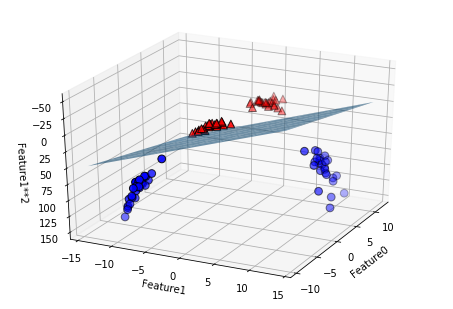

In [76]:
# 使用图形界面显示三维图像
# %matplotlib  

# 三个特征三个系数, 三维空间却只有一个截距? 空间中的面就是只有一个截距
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 三维坐标子图对象
figure = plt.figure()
ax = Axes3D( figure, elev=-152, azim=-26 )

# 特征0,1的最大值和最小值为坐标轴范围
xx = np.linspace( X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50 )
yy = np.linspace( X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50 )

# xx,yy范围内的网格投影点
XX, YY = np.meshgrid(xx, yy)

# 平面表达式: coef[0]XX + coef[1] * YY + coef[2]*ZZ + intercept = 0
ZZ = (coef[0] * XX + coef[1] * YY + intercept)/ -coef[2]

#三维曲面绘制函数
ax.plot_surface( XX, YY, ZZ, rstride=8, cstride=8, alpha=0.6 ) 

# 标签为1,0时的数据点
ax.scatter( X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask,2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
#图饰
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1**2")

扩展数据集上的决策边界在原始特征上的"投影":

Text(0.5,0,'Feature 1')

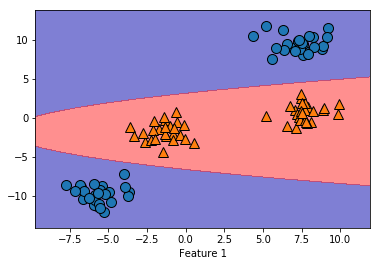

In [77]:
ZZ = YY**2
# @模型对象的决策函数
dec = linear_svm_3d.decision_function( np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()] )
plt.contourf( XX,YY,dec.reshape(XX.shape),\
             levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=0.5 )
mglearn.discrete_scatter(X[:,0],X[:,1],y)
ax = plt.gca()
ax.set_xlabel("Feature 0")
ax.set_xlabel("Feature 1")

> * np.c_: 将二维数组沿着第二轴进行拼接, 如果是一维数组, 先变成二维数组;
> * model.decision_function(): 决策函数, 将决策函数的大小视为地形图的高度;
> * contourf(x,y,z,level): 以x,y为投影点, z为高度的等高线图, level可控制高水平切面的高度; 

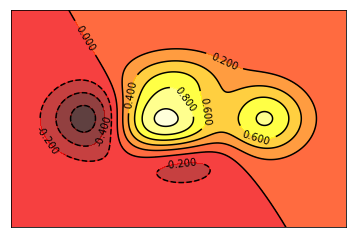

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# 定义等高线高度函数
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(- x ** 2 - y ** 2)

# 数据数目
n = 256
# 定义x, y
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
# 生成网格数据
X, Y = np.meshgrid(x, y)

# 填充等高线的颜色, 8是等高线分为几部分
plt.contourf(X, Y, f(X, Y), 8, alpha = 0.75, cmap = plt.cm.hot)
# 绘制等高线
C = plt.contour(X, Y, f(X, Y), 8, colors = 'black')
# 绘制等高线数据
plt.clabel(C, inline = True, fontsize = 10)

# 去除坐标轴
plt.xticks(())
plt.yticks(())
plt.show()

#### 核技巧

1. 什么是核技巧: 
    * 往线性模型的特征集中添加非线性特征, 即将**低维数据映射到更高维的空间**, 并且最大程度的减少扩展特征的数量, 需要一定的技巧, 这种技巧就是**核技巧**;   
    * 核技巧就好比在**平面地图中画出等高线**这一过程, 一个平面地图上的植被种类(只是标记为散点, 自行判断种类)显然与地形高度有关, 如果在平面地图上添加了等高线, 我们自然可以将植被种类给区分开来了, 添加等高线的这一过程就是"核技巧"的操作;    
    
    
2. 常用的核: 
    * 多项式核: 在一定阶数内, 计算原始特征所有可能的多项式;
    * 径向基函数RBF: 通常定义为空间中任一点x到某一中心xc之间欧氏距离的单调函数, 可记作 k(||x-xc||), 其作用往往是局部的, 即当x远离xc时函数取值很小;     
    
    * 最常用的径向基函数是高斯核函数:  
    
    $\large  k(||x-x_c|| = \exp{( -\frac{ {||x-x_c||}^2 }{ 2\sigma^2} )} 
                   = \exp{( -\gamma {||x-x_c||}^2 )}$

        * 其中$x_c$为核函数中心, $\gamma$为函数的宽度参数(与半径成反比), 控制了函数的径向作用范围, 与$\sigma$(与半径成正比)的含义相反; 
        * 将正太分布沿着对称轴旋转180度形成的空间曲面, 其在水平面的投影为一系列的同心圆, 不同核参数的圆的叠加就可以表示成各种决策边界; 

#### 理解SVM

决策边界可以用**叠加向量**表示, 这些向量的起点在原点, 终点则在类别之间的那些点上, 因此类别边界上的那些点叫做**支持向量**;     
数据点与支持向量之间距离, 反应了数据点对"向量支持"的重要性(dual_coef_); 决定了点的类别; 

RBF核SVM给出的决策边界和支持向量:

Text(0,0.5,'Feature 1')

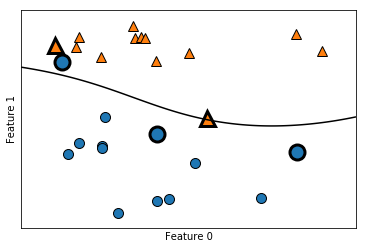

In [79]:
from sklearn.svm import SVC

X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator( svm,X,eps=0.5 )
mglearn.discrete_scatter( X[:,0],X[:,1],y )

#画出支持向量
sv = svm.support_vectors_

#支持向量的类别标签有dual_coef的正负号给出
sv_lebels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter( sv[:, 0], sv[:, 1], sv_lebels, s=15, markeredgewidth=3 )

ax = plt.gca()
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")

> 1. SVM给出的决策边界非常平滑;    
> 2. svm.support_vectors_ 保存了支持向量的位置坐标;    
> 3. dual_coef_ 属性的正负与类别有关;
        svm.support_vectors_  svm.dual_coef_.T
        --------------------  ----------------
        [[ 8.11,  4.29],      [[-10.  ],      
         [ 9.5 ,  1.94],       [ -6.25],      
         [11.56,  1.34],       [ -3.73],      
         [10.24,  2.46],       [ 10.  ],      
         [ 8.  ,  4.85]]       [  9.99]]    

#### SVM调参

* gamma: 控制高斯核的宽度    
* C: 正则化参数, 限制每个点的重要性, 也就是每个点的dual_coef_

参数gamma和C对支持向量机模型的影响: 

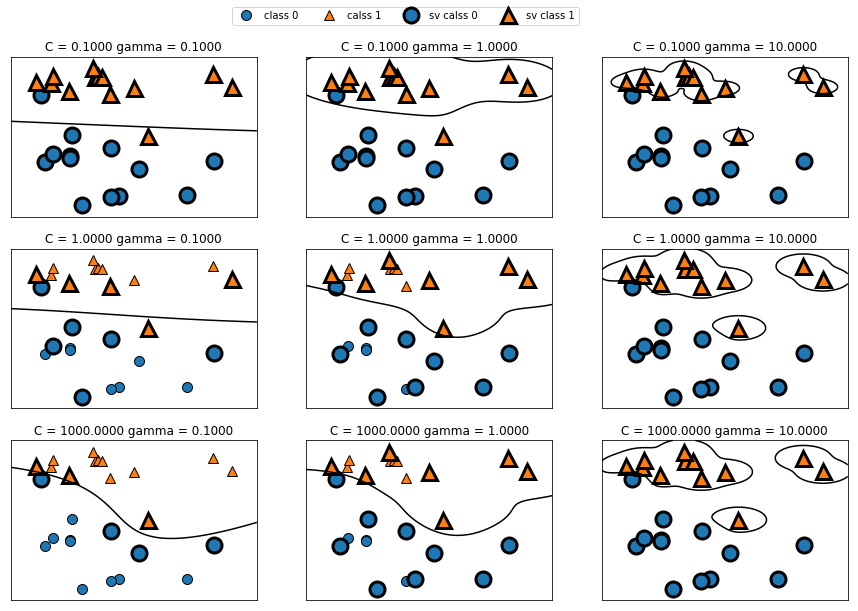

In [80]:
fig,axes = plt.subplots( 3,3,figsize=(15,10) )
for ax, C in zip( axes,[-1,0,3] ):
    for a, gamma in zip( ax, range(-1,2) ):
        mglearn.plots.plot_svm( log_C=C,log_gamma=gamma,ax=a ) 
        # mglearn.plots.plot_svm 根据参数画决策边界, 模型未知
axes[0,0].legend(["class 0","calss 1","sv calss 0","sv class 1"],ncol=4,loc=(.9,1.2))

>1. 从左到右, gamma增大, 决策边界的半径减小, 模型更复杂;    
>2. 从上到下, C发生变化, C值小, 说明数据点的影响范围小, 模型简单;     
 C值增大, 数据点的影响范围增大, 甚至使边界向某些数据点弯曲, 模型复杂; 


将高斯核而应用在乳腺癌数据集:

In [81]:
X_train,X_test,y_train,t_test = train_test_split(cancer.data,cancer.target,\
                                                 random_state=0)
svc = SVC().fit(X_train,y_train)
%ap svc.score( X_train,y_train ); np.round( svc.score( X_test,y_test ),2 )

svc.score( X_train,y_train )  np.round( svc.score( X_test,y_test ),2 )
----------------------------  ----------------------------------------
1.0                           0.63                                    


> 核支持向量机模型存在严重的过拟合, 是因为SVM对参数的选择和数据的缩放非常敏感;

乳腺癌数据集的特征具有完全不同的数量级:

Text(0,0.5,'Feature magnitude')

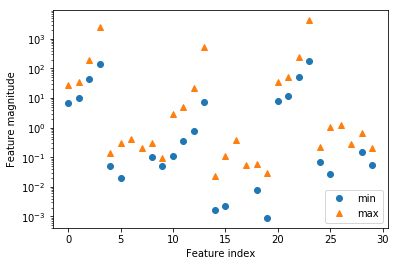

In [82]:
plt.plot(X_train.min(axis=0),'o',label="min")
plt.plot(X_train.max(axis=0),'^',label="max")
plt.legend(loc=4)

plt.yscale("log") 
# 将纵轴的刻度范围变为对数形式

ax = plt.gca()
ax.set_xlabel("Feature index")
ax.set_ylabel("Feature magnitude")

#### 为SVM预处理数据

一般情况下, 要将SVM的特征范围缩放到0-1范围内;

对训练集进行数据缩放: 

In [83]:
min_on_training = X_train.min( axis=0 )
max_on_training = X_train.max( axis=0 )
rang_on_training = max_on_training-min_on_training
#减去最小值除以范围，这样每个特征都是min=0和max=1
X_train_scaled = ( X_train - min_on_training )/rang_on_training
%ap X_train_scaled.min(axis=0);; X_train_scaled.max(axis=0)

                       X_train_scaled.min(axis=0)                       
------------------------------------------------------------------------
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]                        

                       X_train_scaled.max(axis=0)                       
------------------------------------------------------------------------
[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]                        



对测试集进行相同的特征缩放, 然后计算测试集得分:

In [84]:
X_test_scaled = (X_test-min_on_training)/rang_on_training
svc = SVC().fit(X_train_scaled,y_train)
%ap np.round( svc.score(X_train_scaled,y_train), 3) ;;\
             np.round( svc.score(X_test_scaled,y_test),3 )

np.round( svc.score(X_train_scaled,y_train), 3)
-----------------------------------------------
0.948                                          

np.round( svc.score(X_test_scaled,y_test),3 )
---------------------------------------------
0.951                                        


> 数据缩放之后, 模型可能存在欠拟合, 需要增加模型的复杂度:    
* 增大C, 使重要数据点对模型的影响增加; 
* 增大sigmma, 减小决策半径, 使边界线更为紧凑;


#### SVM小结

**类**:    
* sklearn.svm.SVC

**参数**:    
* sigmma: 与模型复杂度成正比 
* C: 与模型复杂度成正比
* 这两个值强烈相关: 需要同时测定

**优点**:    
* 对边界清晰的分类问题适应性很好 
* 适应于高维分类问题
* 当维度高于样本数的时候，SVM 较为有效
* 最终只使用训练集中的支持向量，所以节约内存

**缺点**:    
* 要求数据预处理和数据缩放
* 调参小心要非常小心
* 很难检查结果, 难以理解为什么做出这种预测
* 当数据集的噪音过多时，表现很差    

***

### 神经网络

**多层感知机**: multilayer perception ,MLP, 也被称为前馈神经网络; 

#### 神经网络模型

将线性模型的越策公式可视化: 

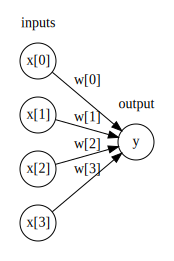

In [85]:
# 右边的节点是左边节点的加权求和
mglearn.plots.plot_logistic_regression_graph()

在MLP模型中, 需要增加**隐藏层**和隐**藏单元**, 多次重复这个加权求和的过程:

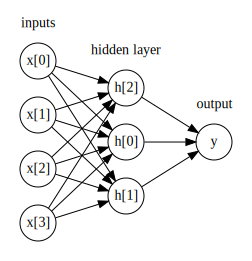

In [86]:
mglearn.plots.plot_single_hidden_layer_graph()

在每个求和项之前还需添加一个**非线性矫正函数**, tanh或者relu:

Text(0,0.5,'relu(x),tanh(x)')

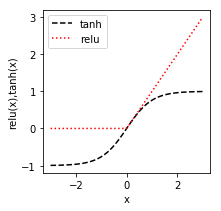

In [87]:
plt.figure( figsize = (3,3))
line = np.linspace(-3,3,100)
plt.plot( line,np.tanh(line),"--k",label="tanh" )
plt.plot( line,np.maximum(line,0),":r",label="relu" )
plt.legend( loc="best" )
ax = plt.gca()
ax.set_xlabel("x")
ax.set_ylabel("relu(x),tanh(x)")

#### 神经网络调参

将**sklearn.neural_network.MLPClassifier**应用到二月数据集上: 

Text(0,0.5,'Feature 1')

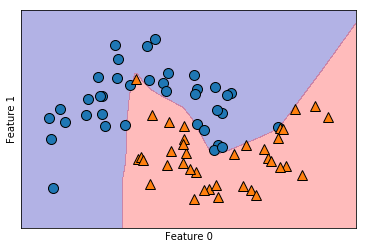

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons( n_samples=100,noise=.25,random_state=3 )
X_train,X_test,y_train,y_test = train_test_split( X,y,stratify=y,random_state=42 )
mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)

mglearn.plots.plot_2d_separator( mlp,X_train,fill=True,alpha=.3 )
mglearn.discrete_scatter( X_train[:,0],X_train[:,1],y_train )
ax = plt.gca()
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")

>
>* 神经网络学到的决策边界完全是非线性的;   
* 默认情况下: MLP使用100个隐单元;    
* 默认非线性: relu;
* activation='tanh': 使用tanh作为激活函数;    
* hidden_layer_sizes=[10]: 设置使用十个隐单元;    
* hidden_layer_sizes=[10,10]: 两个隐层, 每个隐层各有十个隐单元;  
  
  

不同隐单元和alpha参数下的决策边界:

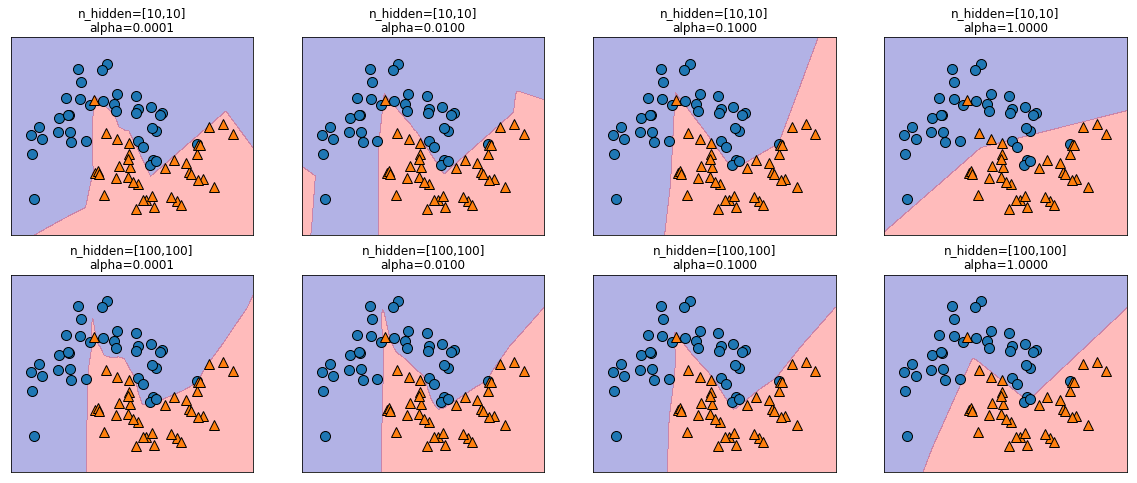

In [89]:
fig,axes = plt.subplots( 2, 4, figsize=(20, 8) )
for axx, n_hidden_nodes in zip( axes, [10, 100] ):
    for ax, alpha in zip( axx,[0.0001,0.01,0.1,1] ):
        mlp = MLPClassifier( solver='lbfgs', random_state=0,alpha=alpha,\
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes] )
        mlp.fit( X_train, y_train )
        mglearn.plots.plot_2d_separator( mlp, X_train, fill=True, alpha=.3, ax=ax )
        mglearn.discrete_scatter( X_train[:, 0], X_train[:, 1], y_train, ax=ax )
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(\
                      n_hidden_nodes,n_hidden_nodes,alpha))

> 常用控制神经网络模型复杂度的方法:    
    * 隐层的个数 
    * 隐单元的个数
    * 正则化参数
    * 权重的随机分布, random_state

对于小型数据集来说, 要特别注意权重的随机化分布:    

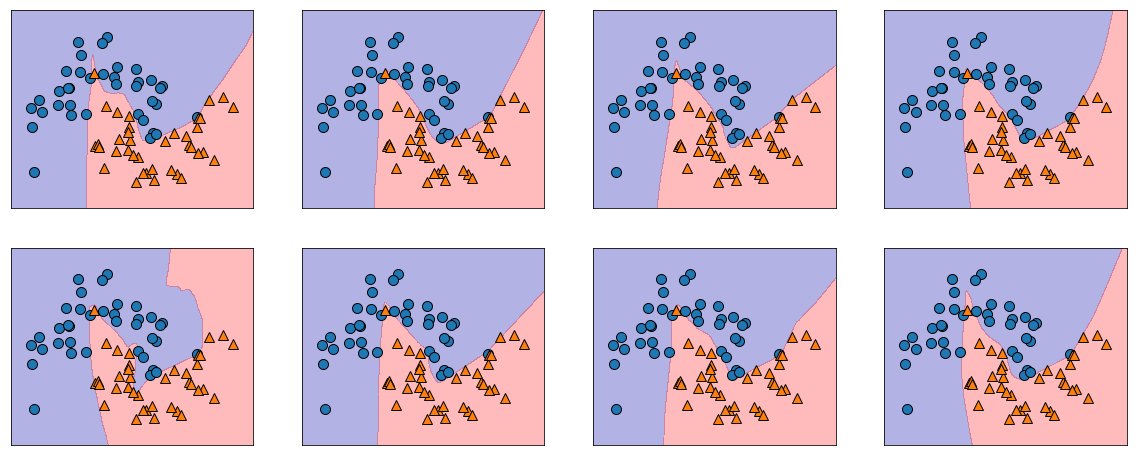

In [90]:
fig,axes = plt.subplots( 2,4,figsize=(20, 8) )
for i, ax in enumerate( axes.ravel() ):
    mlp = MLPClassifier( solver='lbfgs',random_state=i,\
                        hidden_layer_sizes=[100, 100])
    mlp.fit( X_train, y_train )
    mglearn.plots.plot_2d_separator( mlp, X_train, fill=True, alpha=.3, ax=ax )
    mglearn.discrete_scatter( X_train[:, 0], X_train[:, 1], y_train, ax=ax )

将MLPclassifier应用在乳腺癌数据集上:

In [91]:
# 原先每个特征的最大值
%ap cancer.data.max( axis=0 )

                      cancer.data.max( axis=0 )                       
----------------------------------------------------------------------
[2.81e+01, 3.93e+01, 1.88e+02, 2.50e+03, 1.63e-01, 3.45e-01, 4.27e-01,
 2.01e-01, 3.04e-01, 9.74e-02, 2.87e+00, 4.88e+00, 2.20e+01, 5.42e+02,
 3.11e-02, 1.35e-01, 3.96e-01, 5.28e-02, 7.90e-02, 2.98e-02, 3.60e+01,
 4.95e+01, 2.51e+02, 4.25e+03, 2.23e-01, 1.06e+00, 1.25e+00, 2.91e-01,
 6.64e-01, 2.07e-01]                                                  


In [92]:
# 对原始数据进行拟合
X_train, X_test, y_train, y_test = train_test_split(
                                    cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier( random_state=42 )
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


In [93]:
# 计算每个特征的平均值
mean_on_train = X_train.mean(axis=0)
# 计算每个特征的标准差
std_on_train = X_train.std(axis=0)
# 乘以平均值除以标准差使数据的平均值为0,标准差为1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 相同的方式处理测试集
X_test_scaled = (X_test - mean_on_train) / std_on_train

# 对经过缩放的数据进行拟合
mlp = MLPClassifier(max_iter=1000,alpha=1,random_state=0).fit(X_train_scaled, y_train)
%ap mlp.score(X_train_scaled, y_train); mlp.score(X_test_scaled, y_test)

mlp.score(X_train_scaled, y_train)  mlp.score(X_test_scaled, y_test)
----------------------------------  --------------------------------
0.9882629107981221                  0.972027972027972               


要分析神经网络学习到了什么, 比分析线性模型或基于树的模型更为复杂, 下面的例子显示了连接输入和第一个隐层之间的权重;    

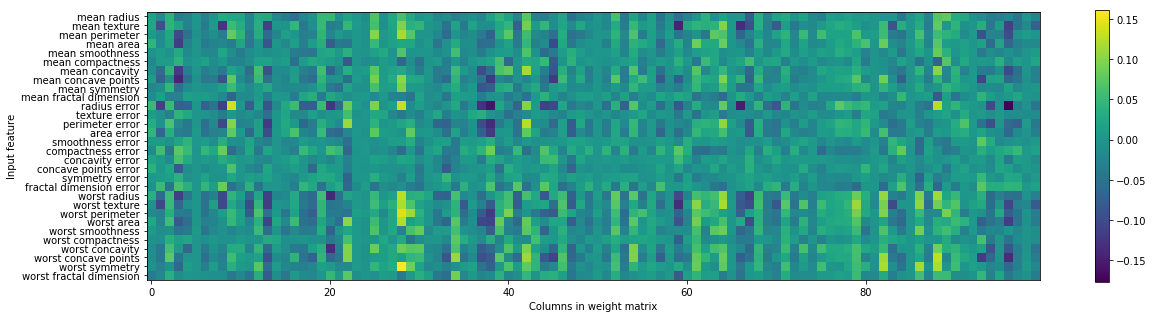

In [94]:
plt.figure( figsize=(20, 5) )
plt.imshow( mlp.coefs_[0], interpolation='none', cmap='viridis' )
plt.yticks( range(30), cancer.feature_names )
ax = plt.gca()
ax.set_xlabel("Columns in weight matrix")
ax.set_ylabel("Input feature")
plt.colorbar()

> plt.imshow(): 将数组显示为图像

#### 神经网络小结

类:    
* sklearn.neural_network.MLPClassifier

参数: 
* 隐藏层个数: 从1开始逐渐增加
* 每层的单元数: 与输入特征个数接近
* 核心算法: solver='adam',对数据缩放敏感; solver='lbfts',鲁棒性好,耗时;
          

优点
* 能够获取大量数据中包含的信息, 并构建无比复杂的模型;
  
缺点
* 训练时间较长;
* 数据预处理;
* 数据中包含不同种类的特征时,使用基于树的模型更好;

## 分类器的不确定估计

### 决策函数

模型的精度(训练集或测试集的精度), 只是反映了模型对数据集整体做出准确预测的程度, 可以近似为模型对每个数据点做出准确预测的程度, 但是不能说明模型对每个数据点的每个类别做出准确预测的程度;      

**分类器的不确定估计**就是获取模型对每个数据点关于每个类别的置信程度:   
* decision_function
* predict_proba

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles( noise=0.25, factor=0.5, random_state=1 )
# 将y的标签0, 1,改为蓝, 红
y_named = np.array(["blue", "red"])[y]
# 注意有两个y
X_train,X_test, y_train_named,y_test_named, y_train,y_test = \
                        train_test_split( X,y_named,y,random_state=0 )
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit( X_train, y_train_named )

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

> * np.array(["blue", "red"])[y]: 一维数组做一维数组的下标, 只不过这个下标数组的长度远远的大于原始数组的长度;
> * train_test_split( X,y_named,y): 按3:1的比例将所有的参数分成两部分, 一部分做训练集, 一部分做测试集, y_named与y一起做参数时, 两者的元素位置一一对应;

决策函数的意义:

In [96]:
X_test_shape = X_test.shape
dfunc_shape = gbrt.decision_function(X_test).shape
dfunc_head = gbrt.decision_function(X_test)[:5]
y_test_head = y_test[:5]
y_test_bred = gbrt.predict(X_test[:5])
%ap X_test_shape; y_test_head; y_test_bred ;; dfunc_shape; dfunc_head 

X_test_shape    y_test_head                 y_test_bred              
------------  ---------------  --------------------------------------
(25, 2)       [1, 0, 0, 0, 1]  ['red', 'blue', 'blue', 'blue', 'red']

dfunc_shape               dfunc_head            
-----------  -----------------------------------
(25,)        [ 4.14, -1.7 , -3.95, -3.63,  4.29]


> 决策函数的输入参数是特征集(既可以是训练集的特征集, 又可以是测试集的训练集);    
而决策函数的输出是一个形状为 (n_samles,n_class) 的二维数组, 换句话说, 决策函数为每个数据点的每个类别都返回一个浮点数, 该浮点数反映了数据点可能属于该类别的概率;

> 对二分类问题而言, 每个数据点的决策函数退化为一个浮点数, 省略了classes_[0]的那一列, 因为正负号可以表示类别, 所以可用正负号来再现预测值;     
决策函数可以在任意范围内取值, 因此对二分类问题它的输出往往很难解释;

在一个分类问题中, 即给出预测结果, 又给出分类器的置信程度: 

Text(0.5,1,'decision_function')

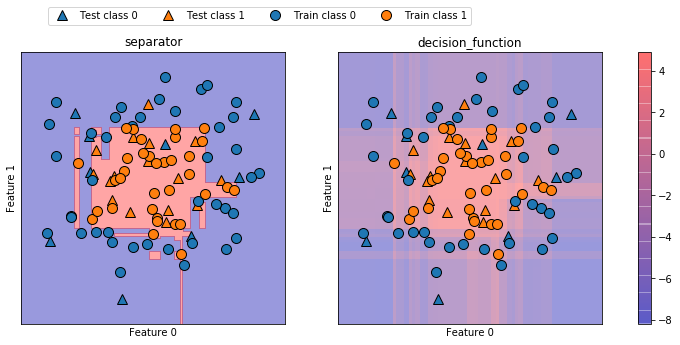

In [97]:
fig, axes = plt.subplots( 1,2,figsize=(13, 5) )

# 子图1画决策边界
mglearn.tools.plot_2d_separator( gbrt,X,ax=axes[0],alpha=.4,\
                                fill=True,cm=mglearn.cm2 )
scores_image = mglearn.tools.plot_2d_scores( gbrt,X,ax=axes[1],
                                alpha=.4,cm=mglearn.ReBl )

# 在每个子图中画出训练点和测试点
for ax in axes:
    mglearn.discrete_scatter( X_test[:, 0],X_test[:, 1],\
                             y_test,markers='^',ax=ax )
    mglearn.discrete_scatter( X_train[:, 0],X_train[:, 1],\
                             y_train,markers='o',ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

# 子图2画每个数据点对应的决策函数  
cbar = plt.colorbar( scores_image,ax=axes.tolist() )
axes[0].legend( ["Test class 0","Test class 1","Train class 0",
                "Train class 1"],ncol=4,loc=(.1, 1.1) )
axes[0].set_title("separator")
axes[1].set_title("decision_function")

> 将不确定度估计矩阵显示为图像, function参数可以选择不确定函数的类型为"predict_proba"或"decision_function";    
mglearn.tools.plot_2d_scores( gbrt,X,ax=axes[1],function=None ) 

### 预测概率

决策函数**decision_function**输出的是每个类别的置信程度, 而概率预测函数**predict_proba**输出的则是每个类别的概率;

概率预测函数的输出数组的形状也是(n_sample,n_class)(二分类也是,而决策函数的二分类输出是一个数), 描述了数据点对应每个类别的概率, 所有类别的概率之和为1; 

In [98]:
%ap gbrt.predict_proba(X_test).shape;gbrt.predict_proba(X_test)[:3]

gbrt.predict_proba(X_test).shape  gbrt.predict_proba(X_test)[:3]
--------------------------------  ------------------------------
(25, 2)                           [[0.02, 0.98],                
                                   [0.85, 0.15],                
                                   [0.98, 0.02]]                


对比 predict 与 decision_function 的结果: 

In [99]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split( \
                                iris.data,iris.target,random_state=42 )
logreg = LogisticRegression()
# 将每一个目标值转化为真实的的类别名,一维数组做下标
named_target = iris.target_names[y_train]
logreg.fit( X_train,named_target ) # fit可以拟合字符串

unique_class = logreg.classes_
X_test_predhd5 = logreg.predict(X_test[:5])

# 返回决策函数数组中,每一行中最大概率所在的位置
argmax_dfunc = np.argmax( logreg.decision_function(X_test[:5]),axis=1 )
argmax_dfunc_class = logreg.classes_[argmax_dfunc][:5]
%ap unique_class;; X_test_predhd5;; argmax_dfunc;; argmax_dfunc_class

             unique_class            
-------------------------------------
['setosa', 'versicolor', 'virginica']

                          X_test_predhd5                         
-----------------------------------------------------------------
['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor']

  argmax_dfunc 
---------------
[1, 0, 2, 1, 1]

                        argmax_dfunc_class                       
-----------------------------------------------------------------
['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor']


> 提出分类器不确定的根本原因在于假阴性(将疾病误认为正常)的存在; 再此讨论的分类器的不确定度能否解决这个问题?     
查看每个数据点对应类别的预测概率: 如果概率接近, 则很可能存在假阳性或者假阴性;

## 监督模型小结

* 最近邻: 小型数据, 容易解释的基准模型    
* 线性模型: 大型高维数据集, 可靠首选    
* 朴素贝叶斯: 只适用于分类    
* 决策树: 不需要数据缩放, 速度快, 容易可视化    
* 随机森林: 比单棵决策树的表现好, 不适用于高维稀疏数据    
* 梯度提升决策树: 与随机森林类似      
* 支持向量机: 对于特征含义相似的中等大小的数据集很强大, 需要数据缩放, 参数敏感     
* 神经网络: 可以构造非常复杂的数据集, 数据缩放和参数调节敏感